# Assignment 4

# Part 1

In [318]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [319]:
iris = datasets.load_iris()

In [320]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [321]:
targetNames = []
for i in range(len(df['target'])):
    if(df['target'].iloc[i] == 0):
        targetNames.append('setosa')
    elif(df['target'].iloc[i] == 1):
        targetNames.append('versicolor')
    else:
        targetNames.append('virginica')
df['targetNames'] = targetNames

## 1.
### 1.1.

Text(0, 0.5, 'sepal width (cm)')

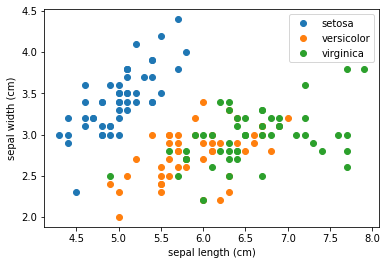

In [322]:
groups = df.groupby('targetNames')
for name, group in groups:
    plt.plot(group["sepal length (cm)"], group["sepal width (cm)"], marker="o", linestyle="", label=name)
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

### 1.2.

Text(0, 0.5, 'petal width (cm)')

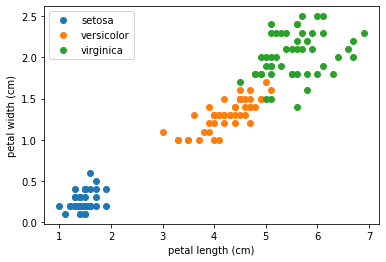

In [323]:
groups = df.groupby('targetNames')
for name, group in groups:
    plt.plot(group["petal length (cm)"], group["petal width (cm)"], marker="o", linestyle="", label=name)
plt.legend()
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

## 2.

In [324]:
from sklearn import svm 
X = iris.data[:, :2]
y = iris.target
C = 1.0 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf').fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X, y)

## 3.

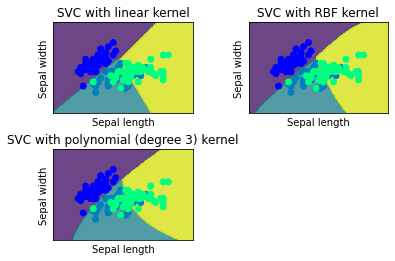

In [325]:
h = .02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
titles = ['SVC with linear kernel',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
	 plt.subplot(2, 2, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
	 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter)
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])
 
plt.show()

## 4.

In [326]:
svc, rbf_svc, poly_svc

(SVC(kernel='linear'), SVC(), SVC(kernel='poly'))

### Linear

In [327]:
svc_pred = svc.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(svc_pred, y)

0.82

### RBF

In [328]:
rbf_svc_pred = rbf_svc.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(rbf_svc_pred, y)

0.82

### Polynomial

In [329]:
poly_svc_pred = poly_svc.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(poly_svc_pred, y)

0.8133333333333334

## 5.

In [330]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
C_range = [0.01, 0.1, 1, 10, 100, 1000]       
degree_range = [1, 2, 3, 4, 5, 6]     
param_grid = {"kernel": ["linear"],
              "C": C_range,
              "degree": degree_range,
              }      
grid = GridSearchCV(estimator = svm.SVC(), 
                    param_grid = param_grid, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    refit = True)  
svm_model = make_pipeline(preprocessing.StandardScaler(), grid)    
svm_model.fit(iris.data, iris.target)   

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9667
{'C': 1, 'degree': 1, 'kernel': 'linear'}


In [331]:
param_grid = {"kernel": ["rbf"],
              "C": C_range,
              "degree": degree_range,
              }   

grid = GridSearchCV(estimator = svm.SVC(), 
                    param_grid = param_grid, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    refit = True) 

svm_model = make_pipeline(preprocessing.StandardScaler(), grid)  
svm_model.fit(iris.data, iris.target)  

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9733
{'C': 10, 'degree': 1, 'kernel': 'rbf'}


In [332]:
from sklearn import svm
C_range = [0.01, 0.1, 1, 10, 100, 1000]    
degree_range = [1, 2, 3, 4, 5, 6] 

param_grid = {"kernel": ["poly"],
              "C": C_range,
              "degree": degree_range,
              }    
grid = GridSearchCV(estimator = svm.SVC(), param_grid = param_grid, cv = 5, scoring = 'accuracy', refit = True)   
svm_model = make_pipeline(preprocessing.StandardScaler(), grid)  
svm_model.fit(iris.data, iris.target)      

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9733
{'C': 100, 'degree': 3, 'kernel': 'poly'}


## 6.

In [333]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing 
weight_functions = ["uniform", "distance"]
p_values = [1, 2]
n_range = list(range(1, 51))
param_grid = {"n_neighbors": n_range,"weights": weight_functions,"p": p_values}
grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, cv = 5, scoring = 'accuracy', refit = True) 
knn_model = make_pipeline(preprocessing.StandardScaler(), grid)    
knn_model.fit(iris.data, iris.target)      
print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)
print("Accuracy of the tuned model: %.4f" %grid.best_score_)

Accuracy of the tuned model: 0.9667
{'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
Accuracy of the tuned model: 0.9667


## 7.

In [334]:
from sklearn import svm 
X = iris.data[:, :2]  
y = iris.target
C = 100  
poly_svc = svm.SVC(kernel='poly', degree=3, C=100).fit(X, y)

Text(0.5, 1.0, 'SVC with polynomial (degree 3) kernel')

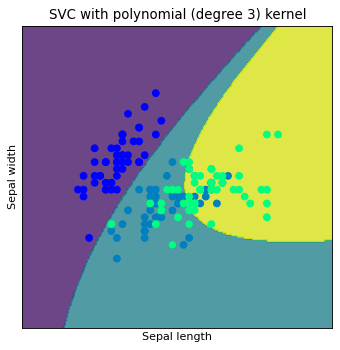

In [335]:

from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)
h = .02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
titles = ['SVC with polynomial (degree 3) kernel']
plt.subplot(2, 2, i + 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title(titles[0])

I would pick Polynomial SVM with degree 3 as it has th highest accuracy of 97.33%

# Part 2.

In [336]:
import pandas as pd

In [337]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [338]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [339]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression()

In [340]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [341]:
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = mean_squared_error(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [3.5603843790698817, 3.29767521633842, 2.089433559731435, 2.8247428262670535, 1.3027753955557309, 1.7416361786450048, 8.173382141112382, 2.1140974612046888, 3.042731092542851, 2.4528179307176847]
Avg accuracy : 3.0599676181185136


In [342]:
X = df.iloc[:,1:-2]
y = df.iloc[:,-1]

In [343]:
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = mean_squared_error(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [3.382645718260844, 3.287360554292982, 2.0918550672558323, 2.8178438925198495, 1.273110826464318, 1.7439185279924243, 8.000611096154314, 2.0765093635091825, 3.0363530094268425, 2.428983499528102]
Avg accuracy : 3.013919155540469


Although the difference between the average accuracies is very less, the case without newspaper shall be preferred as it has a lower mean squared error when compared to the model that considers newspapers as well

# Part 3.

In [344]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

## 1.

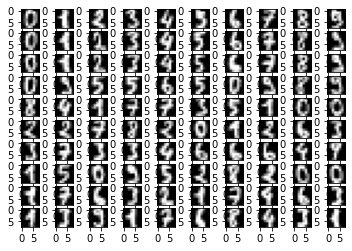

In [345]:
fig, ax =  plt.subplots(nrows=10, ncols=10)
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(digits.images[( j if i == 0 else int(str(i) + str(j)))], cmap=plt.get_cmap('gray'))    

## 2. and 3.

In [346]:
df = pd.DataFrame(data = np.c_[digits['data'], digits['target']], columns= digits['feature_names'] + ['target'])

shape of pca_reduced.shape =  (1797, 2)


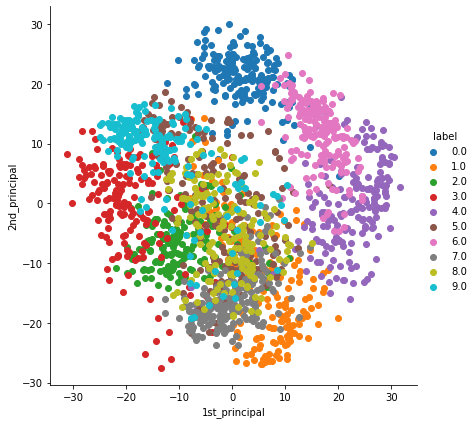

In [347]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(df.iloc[:,:-1])
print("shape of pca_reduced.shape = ", pca_data.shape)
pca_data = np.vstack((pca_data.T, df.iloc[:,-1])).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

5 and 8 can get mislabeled <br>
5 and 9 can get mislabeled <br>
6 and 4 have some chance of being mislabeled<br>
7, 8 and 9 can get mislabeled<br>


In [348]:
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=5, n_components=2).fit_transform(df.iloc[:,:-1])

In [349]:
X_iso.shape

(1797, 2)

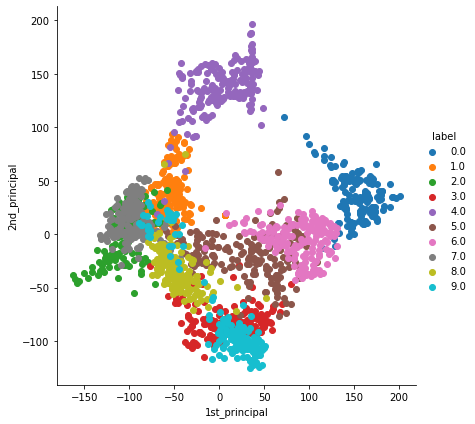

In [350]:
iso_data = np.vstack((X_iso.T, df.iloc[:,-1])).T
iso_df = pd.DataFrame(data=iso_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(iso_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

2 and 7 can get mislabeled <br>
5 and 6 cna get mislabeled <br>
3 and 9 can get mislabeled <br>
3 and 8 can get mislabeled <br>



## 4.<br>
### PCA

In [351]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_pca = gnb.fit(pca_df.iloc[:,:-1], pca_df.iloc[:,-1]).predict(pca_df.iloc[:,:-1])
y_pred_iso = gnb.fit(iso_df.iloc[:,:-1], iso_df.iloc[:,-1]).predict(iso_df.iloc[:,:-1])

In [352]:
from sklearn.metrics import classification_report
print(classification_report(pca_df.iloc[:,-1], y_pred_pca))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       178
         1.0       0.60      0.57      0.59       182
         2.0       0.68      0.72      0.70       177
         3.0       0.82      0.68      0.74       183
         4.0       0.85      0.89      0.87       181
         5.0       0.27      0.09      0.13       182
         6.0       0.85      0.82      0.83       181
         7.0       0.55      0.82      0.65       179
         8.0       0.37      0.38      0.37       174
         9.0       0.53      0.71      0.61       180

    accuracy                           0.66      1797
   macro avg       0.64      0.66      0.64      1797
weighted avg       0.64      0.66      0.64      1797



## ISO

In [353]:
print(classification_report(iso_df.iloc[:,-1], y_pred_iso))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       178
         1.0       0.79      0.78      0.78       182
         2.0       0.58      0.36      0.45       177
         3.0       0.56      0.87      0.68       183
         4.0       0.97      0.97      0.97       181
         5.0       0.66      0.55      0.60       182
         6.0       0.80      0.91      0.85       181
         7.0       0.51      0.73      0.60       179
         8.0       0.70      0.87      0.77       174
         9.0       0.90      0.21      0.34       180

    accuracy                           0.72      1797
   macro avg       0.75      0.72      0.70      1797
weighted avg       0.75      0.72      0.70      1797



In [354]:
y_pred = gnb.fit(df.iloc[:,:-1], df.iloc[:,-1]).predict(df.iloc[:,:-1])
print(classification_report(df.iloc[:,-1], y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       178
         1.0       0.83      0.85      0.84       182
         2.0       0.98      0.64      0.77       177
         3.0       0.94      0.79      0.86       183
         4.0       0.98      0.84      0.90       181
         5.0       0.91      0.93      0.92       182
         6.0       0.96      0.99      0.98       181
         7.0       0.72      0.99      0.83       179
         8.0       0.58      0.86      0.69       174
         9.0       0.94      0.71      0.81       180

    accuracy                           0.86      1797
   macro avg       0.88      0.86      0.86      1797
weighted avg       0.89      0.86      0.86      1797



## 5.

In [355]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
y_pred_pca = clf.fit(pca_df.iloc[:,:-1], pca_df.iloc[:,-1]).predict(pca_df.iloc[:,:-1])
y_pred_iso = clf.fit(iso_df.iloc[:,:-1], iso_df.iloc[:,-1]).predict(iso_df.iloc[:,:-1])

### PCA

In [356]:
print(classification_report(pca_df.iloc[:,-1], y_pred_pca))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       178
         1.0       1.00      1.00      1.00       182
         2.0       1.00      1.00      1.00       177
         3.0       1.00      1.00      1.00       183
         4.0       1.00      1.00      1.00       181
         5.0       1.00      1.00      1.00       182
         6.0       1.00      1.00      1.00       181
         7.0       1.00      1.00      1.00       179
         8.0       1.00      1.00      1.00       174
         9.0       1.00      1.00      1.00       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797



### ISO

In [357]:
print(classification_report(iso_df.iloc[:,-1], y_pred_iso))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       178
         1.0       1.00      1.00      1.00       182
         2.0       1.00      1.00      1.00       177
         3.0       1.00      1.00      1.00       183
         4.0       1.00      1.00      1.00       181
         5.0       1.00      1.00      1.00       182
         6.0       1.00      1.00      1.00       181
         7.0       1.00      1.00      1.00       179
         8.0       1.00      1.00      1.00       174
         9.0       1.00      1.00      1.00       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797



In [358]:
y_pred = clf.fit(df.iloc[:,:-1], df.iloc[:,-1]).predict(df.iloc[:,:-1])
print(classification_report(df.iloc[:,-1], y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       178
         1.0       1.00      1.00      1.00       182
         2.0       1.00      1.00      1.00       177
         3.0       1.00      1.00      1.00       183
         4.0       1.00      1.00      1.00       181
         5.0       1.00      1.00      1.00       182
         6.0       1.00      1.00      1.00       181
         7.0       1.00      1.00      1.00       179
         8.0       1.00      1.00      1.00       174
         9.0       1.00      1.00      1.00       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797



## 6.

In [359]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [360]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

### Grid Search CV

In [361]:
rf_Model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [362]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 64}

## With randomized search cv

In [363]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [364]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [365]:
rf_RandomGrid.best_params_

{'n_estimators': 72,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

## 7.

In [366]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


### Naive Bayes

In [367]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(df.iloc[:,:-1], df.iloc[:,-1]).predict(df.iloc[:,:-1])

In [368]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df.iloc[:,-1], y_pred)

array([[176,   0,   0,   0,   1,   0,   0,   1,   0,   0],
       [  0, 154,   0,   0,   0,   0,   3,   5,  14,   6],
       [  0,  13, 113,   0,   0,   1,   1,   0,  49,   0],
       [  0,   2,   2, 145,   0,   6,   0,   7,  20,   1],
       [  1,   1,   0,   0, 152,   1,   2,  21,   3,   0],
       [  0,   0,   0,   3,   0, 169,   1,   6,   2,   1],
       [  0,   1,   0,   0,   0,   1, 179,   0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0, 177,   0,   0],
       [  0,   8,   0,   1,   0,   3,   0,  12, 150,   0],
       [  1,   6,   0,   5,   1,   3,   0,  17,  20, 127]], dtype=int64)

### Random Forest

In [369]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
y_pred = clf.fit(df.iloc[:,:-1], df.iloc[:,-1]).predict(df.iloc[:,:-1])

In [370]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df.iloc[:,-1], y_pred)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]], dtype=int64)